## Feature Scaling

**Why to normalize prior to model fitting?**

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

### Standardizion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [2]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


#  Standardization
*Standardization is the process of centering a variable at zero 
and standardizing the data variance to 1. To standardize a 
dataset, you simply have to subtract each data point from 
the mean of all the data points and divide the result by the 
standard deviation of the data.*


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [5]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head(20)

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377
5,NaN,-0.478116,0.827377
6,1.674039,0.395814,-1.566107
7,-1.908136,-0.224083,0.827377
8,-0.185937,-0.424256,0.827377
9,-1.081480,-0.042956,-0.369365


<Axes: xlabel='age', ylabel='Density'>

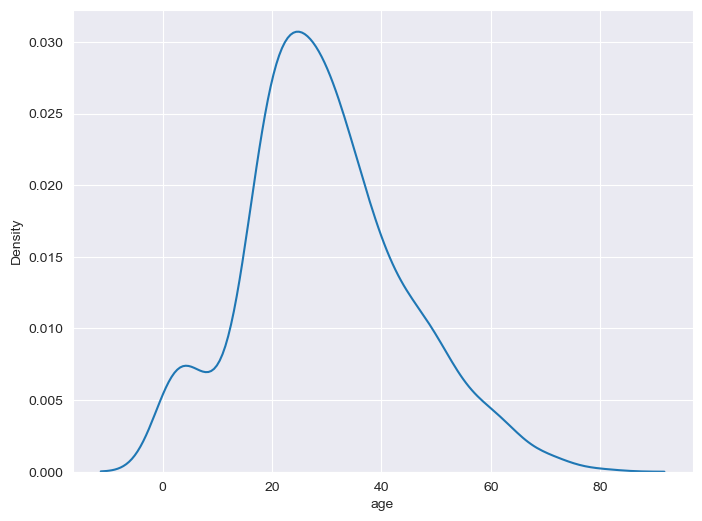

In [6]:
sns.kdeplot(titanic_data['age'])

<Axes: xlabel='age', ylabel='Density'>

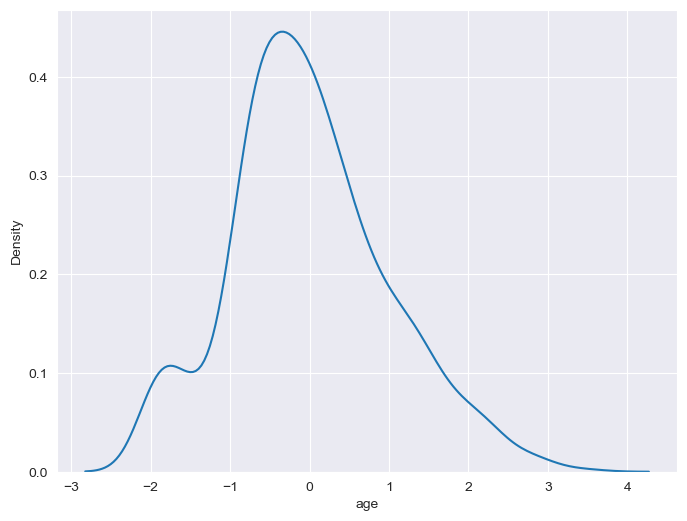

In [7]:
sns.kdeplot(titanic_data_scaled['age'])

### Min/Max Scaling

In min/max scaling, you subtract each value by the minimum 
value and then divide the result by the difference of minimum 
and maximum value in the dataset

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [9]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<Axes: xlabel='age', ylabel='Density'>

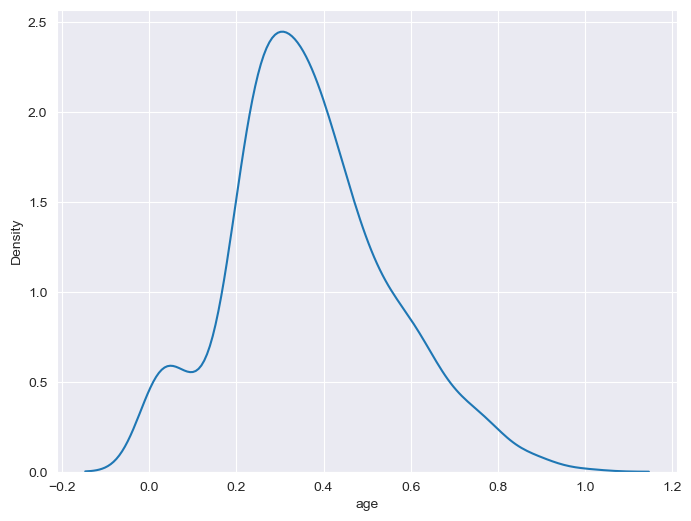

In [13]:
sns.kdeplot(titanic_data_scaled.age)

### Mean Normalization

Mean normalization is very similar to min/max scaling, except 
in mean normalization the mean of the dataset is subtracted 
from each value and the result is divided by the range, i.e., the 
difference between the minimum and maximum values.

In [14]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [15]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [16]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals

<Axes: xlabel='age', ylabel='Density'>

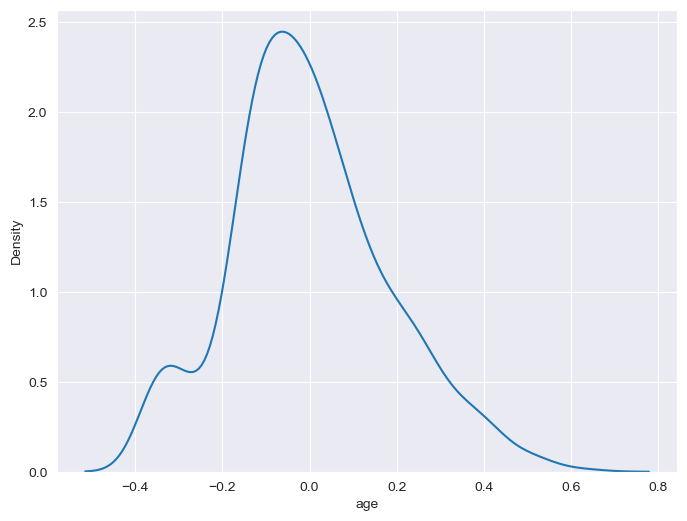

In [17]:
sns.kdeplot(titanic_data_scaled['age'])

## Handling Missing Data

### Handling Missing Numerical Data

To handle missing numerical 
data, we can use statistical techniques. The use of statistical 
techniques or algorithms to replace missing values with 
statistically generated values is called *imputation*.

#### Mean and Median Imputation

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [22]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [23]:
median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [24]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age']  = np.round(titanic_data['Mean_Age'], 1)

titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


The mean and median imputation can affect the data 
distribution for the columns containing the missing values. 
Especially, the variance of the column is decreased by mean 
and median imputation since now more values are added to the center of the distribution. The following script plots the 
distribution of data for the age, Median_Age, and Mean_Age 
columns.

You can clearly see that the default values in the age columns 
have been distorted by mean and median imputation, and the 
overall variance of the dataset has also been decreased.

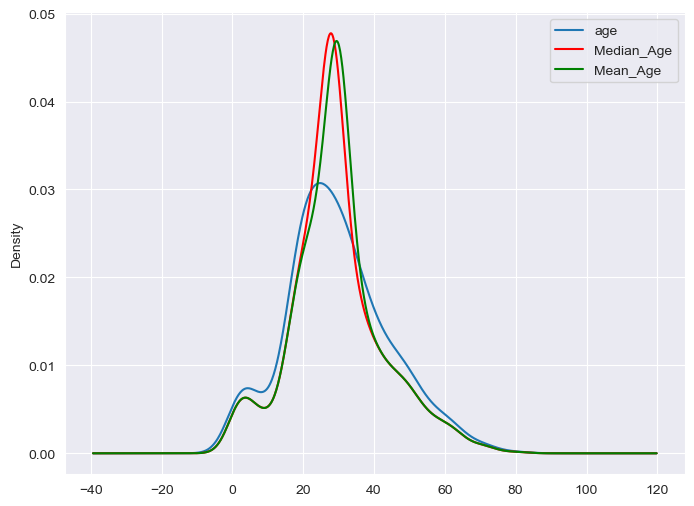

In [25]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['Median_Age'] .plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### End of Distribution Imputation

For randomly missing data, the most 
commonly used techniques are end of distribution/ end of tail 
imputation.

In case the data is normally distributed, the end of the 
distribution value can be calculated by multiplying the mean 
with three standard deviations. In the case of skewed data 
distributions, the Inter Quartile Rule can be used to find the 
tail values.

IQR = 75th Quantile – 25th Quantile

Upper IQR Limit = 75th Quantile + IQR x 1.5 Lower IQR Limit = 
25th Quantile – IQR x 1.5

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')



titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]


titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

<Axes: >

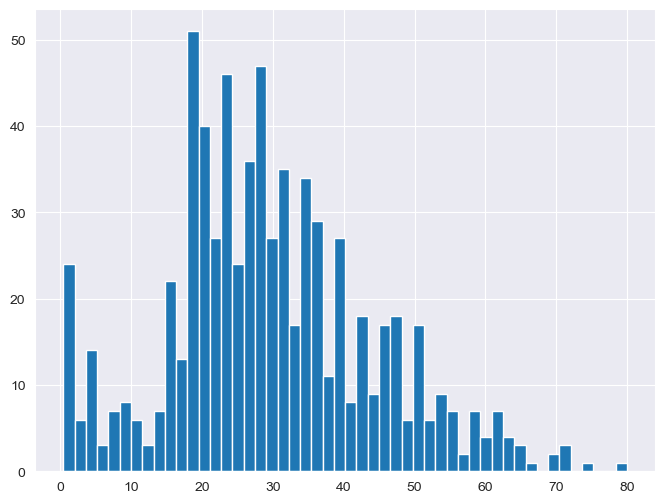

In [27]:
titanic_data.age.hist(bins=50)

The output shows that the age column has an almost normal 
distribution. Hence, the end of distribution value can be 
calculated by multiplying the mean value of the age column 
by three standard deviations, as shown in the following script:

In [28]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406095


In [29]:
import numpy as np

titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


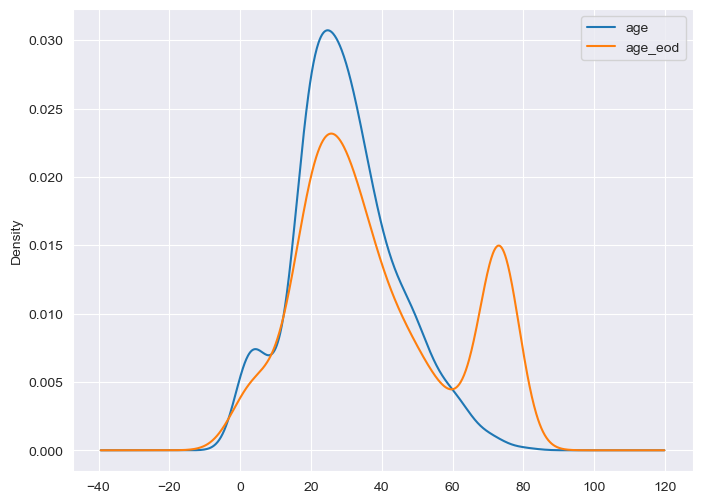

In [30]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)
titanic_data['age_eod'] .plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Handling Missing Categorical Data

#### Frequent Category Imputation

One of the most common ways of handling missing values in 
a categorical column is to replace the missing values with the 
most frequently occurring values, i.e., the mode of the column. 

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

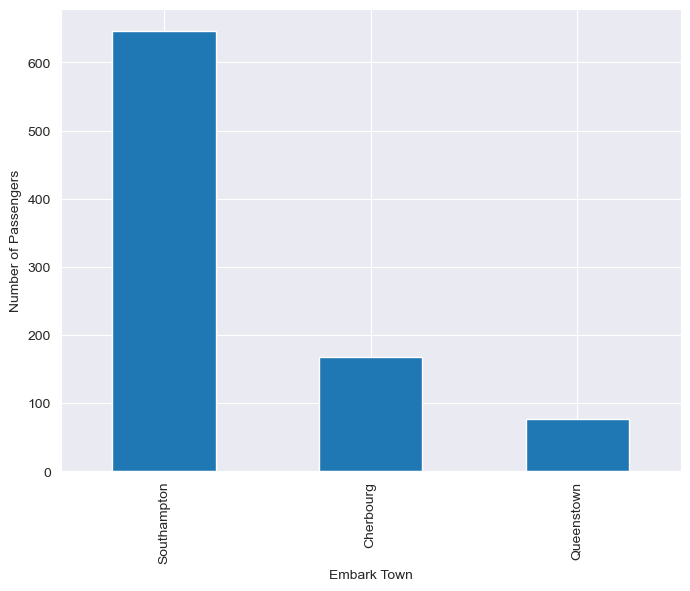

In [36]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

In [34]:
titanic_data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [35]:
titanic_data.embark_town.fillna('Southampton', inplace=True)

Let’s now find the mode of the age column and use it to 
replace the missing values in the age column.

In [37]:
titanic_data.age.mode()

0    24.0
Name: age, dtype: float64

In [38]:
import numpy as np


titanic_data['age_mode'] = titanic_data.age.fillna(24)


titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


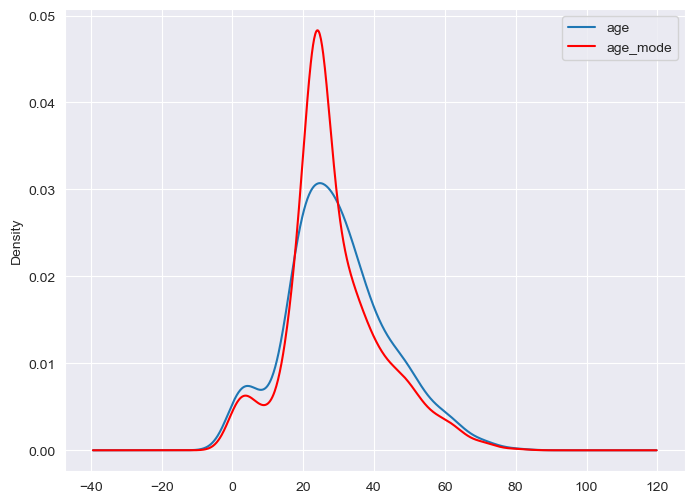

In [39]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['age_mode'] .plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Missing Category Imputation

Missing category imputation is similar to arbitrary value 
imputation. In the case of categorical value, missing value 
imputation adds an arbitrary category, e.g., missing in place of 
the missing values

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [43]:
titanic_data.embark_town.fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of Passengers')

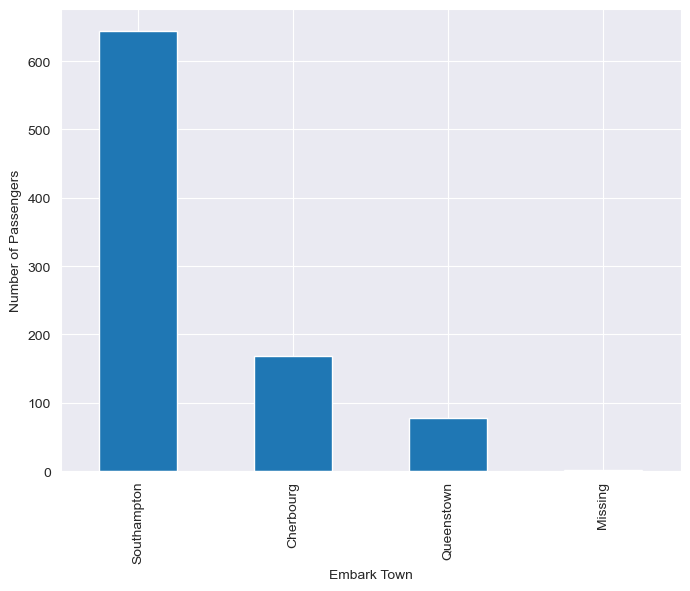

In [44]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

## Categorical Data Encoding

Models based on statistical algorithms, such as machine 
learning and deep learning, work with numbers. However, 
datasets can contain numerical, categorical, date time, and 
mixed variables. A mechanism is needed to convert categorical 
data to its numeric counterpart so that the data can be used 
to build statistical models. The techniques used to convert 
numeric data into categorical data are called categorical data 
encoding schemes. Here lets see some of the 
most commonly used categorical data encoding schemes.

### One hot Encoding

One hot encoding is one of the most commonly used categorical 
encoding schemes. In one hot encoding, for each unique value in the categorical column, a new column is added. Integer 1 is 
added to the column that corresponds to original label, and all 
the remaining columns are filled with zeros. 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
titanic_data  = titanic_data[["sex", "class", "embark_town"]]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [47]:
print(titanic_data['sex'].unique())
print(titanic_data['class'].unique())
print(titanic_data['embark_town'].unique())

['male' 'female']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [48]:
import pandas as pd
temp = pd.get_dummies(titanic_data['sex'])

temp.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [49]:
pd.concat([titanic_data['sex'],
           pd.get_dummies(titanic_data['sex'])], axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [ ]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'])

temp.head()

In [ ]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'], drop_first = True)

temp.head()

In [ ]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'], dummy_na = True ,drop_first = True)

temp.head()

### 3.3.2. Label Encoding

In [ ]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(titanic_data['class'])

titanic_data['le_class'] = le.transform(titanic_data['class'])

titanic_data.head()

In [ ]:
le.classes_

## 3.4. - Data Discretization

### 3.4.1. Equal Width Discretization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

In [ ]:
sns.distplot(diamond_data['price'])

In [ ]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range )

In [ ]:
price_range  / 10

In [ ]:

lower_interval = int(np.floor( diamond_data['price'].min()))
upper_interval = int(np.ceil( diamond_data['price'].max()))


interval_length = int(np.round(price_range / 10))

print(lower_interval)
print(upper_interval)
print(interval_length)

In [ ]:
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

In [ ]:
bin_labels = ['Bin_no_' + str(i) for i in range(1, len(total_bins))]
print(bin_labels)

In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=total_bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)


### 3.4.2. Equal Frequency Discretization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

In [ ]:
discretised_price, bins = pd.qcut(diamond_data['price'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_price, diamond_data['price']], axis=1).head(10)

In [ ]:
print(bins)
print(type(bins))

In [ ]:
discretised_price.value_counts()

In [ ]:
bin_labels  = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)

In [ ]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

In [ ]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

## 3.5. Outlier Handling

### 3.5.1. Outlier Trimming

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

In [ ]:
sns.boxplot( y='age', data=titanic_data)

In [ ]:
IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25)

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR * 1.5)
upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR * 1.5)

print(lower_age_limit)
print(upper_age_limit)

In [ ]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True,
                       np.where(titanic_data["age"] < lower_age_limit, True, False))

In [ ]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers), ]

titanic_data.shape, titanic_without_age_outliers.shape

In [ ]:
sns.boxplot( y='age', data = titanic_without_age_outliers)

### 3.5.2. Outlier Capping Using Mean & Standard Deviation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

In [ ]:
sns.boxplot( y='age', data=titanic_data)

In [ ]:

lower_age_limit = titanic_data["age"].mean() - (3 * titanic_data["age"].std())
upper_age_limit = titanic_data["age"].mean() + (3 * titanic_data["age"].std())

print(lower_age_limit)
print(upper_age_limit)

In [ ]:
titanic_data["age"]= np.where(titanic_data["age"] > upper_age_limit, upper_age_limit,
                       np.where(titanic_data["age"] < lower_age_limit, lower_age_limit, titanic_data["age"]))

In [ ]:
sns.boxplot( y='age', data=titanic_data)

## Exercise 3.1

#### Question 1

Which of the following techniques can be used to remove outliers from a dataset?

A. Trimming \
B. Censoring \
C. Discretization \
D. All of the above

Answer: D
    
#### Question 2

Which attribute is set to True to remove the first column from the one-hot encoded columns generated via get_dummies() method?

A. drop_first \
B. remove_first \
C. delete_first \
D. None of the above

Answer: A
    

#### Question 3

After standardisation the mean value of the dataset becomes:

A. 1 \
B. 0 \
C. -1 \
D. None of the above

Answer: B
    

## Exercise 3.2

Replace the missing values in the "deck" column of the Titanic dataset by the most 
frequently occuring categories in that column. Plot a bar plot for the updated "deck" column. 

**Solution:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["deck"]]
titanic_data.head()
titanic_data.isnull().mean()

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')

titanic_data.deck.mode()

titanic_data.deck.fillna('C', inplace=True)

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')